In [6]:
import pandas as pd

In [7]:
# Đọc dữ liệu từ file CSV và lưu vào DataFrame
data = pd.read_csv('loan_data.csv')
# In ra 5 dòng đầu tiên của DataFrame
print(data.head(5))
# Kích thuovc của DataFrame
print(data.shape)

#  hiển thị thông tin các cột
print(data.info())
# Kiểm tra gia trị null trong DataFrame
print(data.isnull().sum())

# # tìm tần suất của các giá trị trong cột LoanAmount
print(data['LoanAmount'].value_counts())
# # tìm giá trị trung bình của cột LoanAmount
print(data['LoanAmount'].mean())
# # tìm giá trị trung vị của cột LoanAmount
print(data['LoanAmount'].median())

# Đếm số lượng mỗi giá trị trong cột "Gender"
gender_counts = data['Gender'].value_counts()

# Lấy tổng số lượng ứng viên có giới tính là "Male"
total_male = gender_counts.get('Male', 0)

print("Tổng số ứng viên có giới tính là Male:", total_male)

#  Self_Employed  

print("Tổng số Yes:", data['Self_Employed'].value_counts().get('Yes', 0))




    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

# Mô tả dự liệu
Data bao gồm thông tin như giới tính, tình trạng hôn nhân, số người phụ thuộc, trình độ học vấn, thu nhập, số tiền vay, thời hạn vay, lịch sử tín dụng, khu vực tài sản và trạng thái của khoản vay.
Tổng số ứng viên có giới tính là Male: 291 người cho thấy người có giới tính Male vay vốn chiếm 76%, Qua số liệu cho thấy Self_Employed  là Yes có 35 người chiếm 9% ít vay vốn so với người chưa tự chủ về tài chính, người tự chủ tài chiến chiếm 91% (346/381 tổng người khảo sát), cho thấy người chưa tự chủ về tài chính có xu hướng vai vốn cao


In [21]:
#  xác đinh biến định lượng và biến định tính
# Biến định lượng: LoanAmount, Loan_Amount_Term, Credit_History
# Biến định tính:  còn lại
#  xác đinh biến định lượng và biến định tính
print(data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [28]:
categorical_columns=data.select_dtypes(include=['object']).columns
print("Các cột dữ liệu phân loại:")
print(categorical_columns)

Các cột dữ liệu phân loại:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


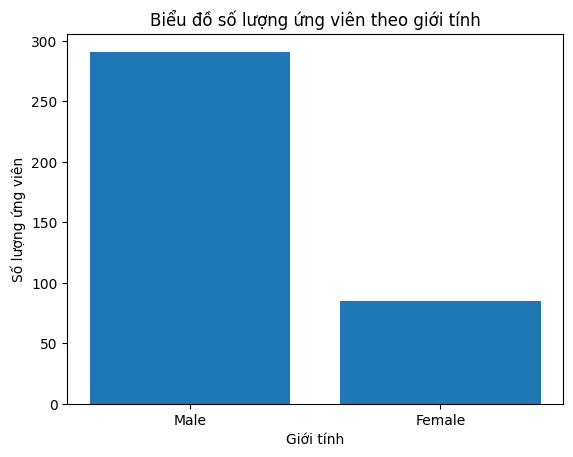

In [8]:
# Vẽ biểu đồ barChart cho Gender               
import matplotlib.pyplot as plt
# Đếm số lượng mỗi giá trị trong cột "Gender"
gender_counts = data['Gender'].value_counts()

# Vẽ biểu đồ cột (bar chart) cho cột "Gender"
plt.bar(gender_counts.index, gender_counts.values)

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ số lượng ứng viên theo giới tính')

# Đặt nhãn cho trục x và y
plt.xlabel('Giới tính')
plt.ylabel('Số lượng ứng viên')

# Hiển thị biểu đồ
plt.show()

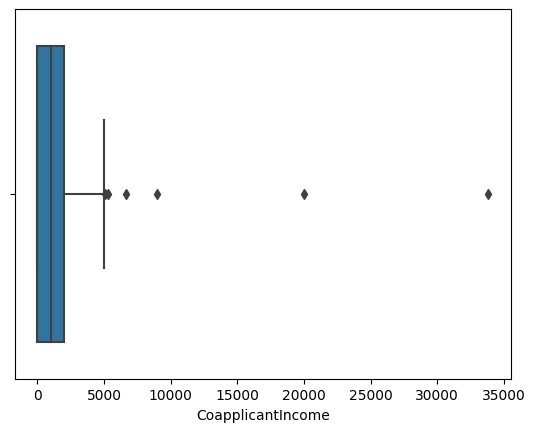

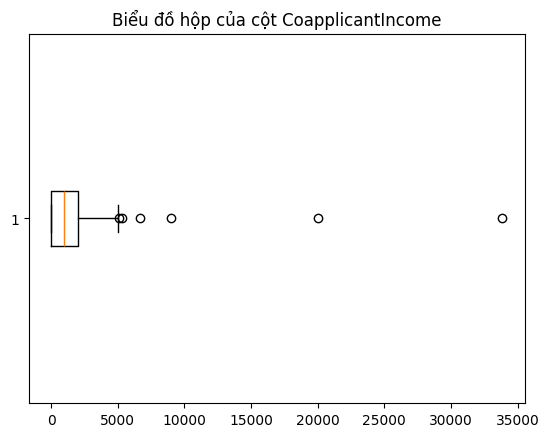

In [32]:
# Vẽ biểu đồ hộp (boxplot) cho cột CoapplicantIncome
# plt.boxplot(data['CoapplicantIncome'])

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ hộp của cột CoapplicantIncome')
#  trục số nằm dưới
plt.boxplot(data['CoapplicantIncome'], vert=False)  # vert=False để trục số nằm dưới

# Hiển thị biểu đồ
plt.show()

In [35]:
#Tìm tứ phân vị 25%, 50%, 75% của cột CoapplicantIncome
print(data['CoapplicantIncome'].quantile([0.25, 0.5, 0.75]))
#trung bình, trung vị, max, min của cột CoapplicantIncome
print(data['CoapplicantIncome'].mean())
print(data['CoapplicantIncome'].median())
print(data['CoapplicantIncome'].max())
print(data['CoapplicantIncome'].min())


0.25       0.0
0.50     983.0
0.75    2016.0
Name: CoapplicantIncome, dtype: float64
1277.2753805476116
983.0
33837.0
0.0


Phân phối của thu nhập: Biểu đồ boxplot cho thấy phân phối của dữ liệu thu nhập của người đồng ứng vay. Phân phối này có thể được đánh giá dựa trên độ dài của hộp (box) và độ dài của RÂU  

Các điểm ngoại lai: Các điểm ngoại lai là các điểm nằm ngoài khoảng từ Q1 - 1.5xIQR đến Q3 + 1.5xIQR, trong đó Q1 là phân vị 25%, Q3 là phân vị 75%, và IQR là phạm vi tương quan tương đối (interquartile range). Các điểm ngoại lai có thể là các giá trị không phù hợp hoặc không đại diện cho phân phối chung của dữ liệu.

Trung bình và phân vị: trung bình người vay thuộc cộng tác viên có mức lương trung bình 1277.27
Trung vị 983 

Độ biến động: khoảng này rộng, tức là dữ liệu có độ biến động cao

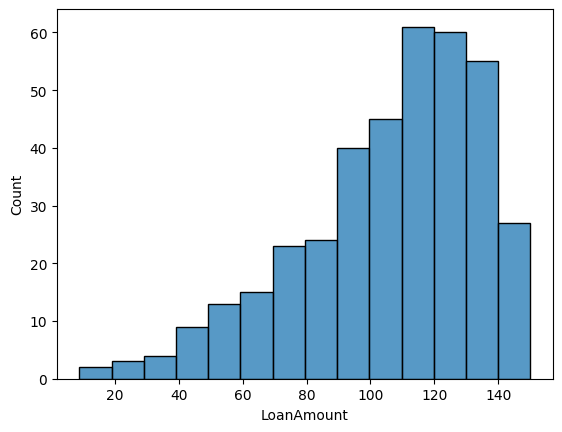

(array([ 2.,  7., 13., 17., 30., 33., 69., 89., 76., 45.]),
 array([  9. ,  23.1,  37.2,  51.3,  65.4,  79.5,  93.6, 107.7, 121.8,
        135.9, 150. ]),
 <BarContainer object of 10 artists>)

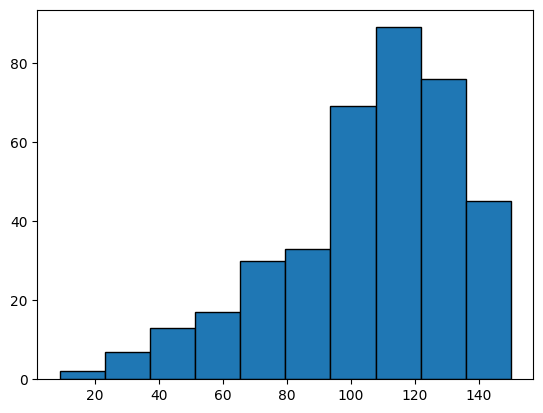

In [50]:
#  histogram của LoanAmount
# Vẽ biểu đồ histogram cho cột "LoanAmount"
plt.hist(data['LoanAmount'], bins=10, edgecolor='black')
# viên biểu đồ
# line của cột



In [53]:
# Trung bình của LoanAmount
mean_loan_amount = data['LoanAmount'].mean()
# Trung vị của LoanAmount
median_loan_amount = data['LoanAmount'].median()
# max của LoanAmount, min của LoanAmount
max_loan_amount = data['LoanAmount'].max()
min_loan_amount = data['LoanAmount'].min()
print("Trung bình của LoanAmount:", mean_loan_amount)
print("Trung vị của LoanAmount:", median_loan_amount)
print("Max của LoanAmount:", max_loan_amount)
print("Min của LoanAmount:", min_loan_amount)

Trung bình của LoanAmount: 104.98687664041995
Trung vị của LoanAmount: 110.0
Max của LoanAmount: 150.0
Min của LoanAmount: 9.0


đựa vào đồ thị Histogram của LoanAmount cho thấy số tiền vay khoảng 110 là nhiều nhất
--Thường vay từ 9tr thấp nhất
cao nhất 150 tr

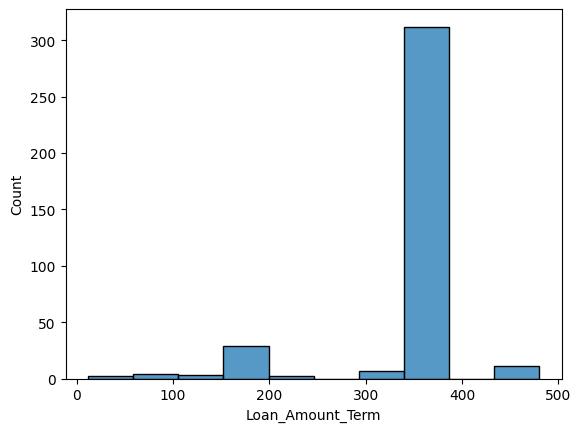

(array([  2.,   4.,   3.,  29.,   2.,   0.,   7., 312.,   0.,  11.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

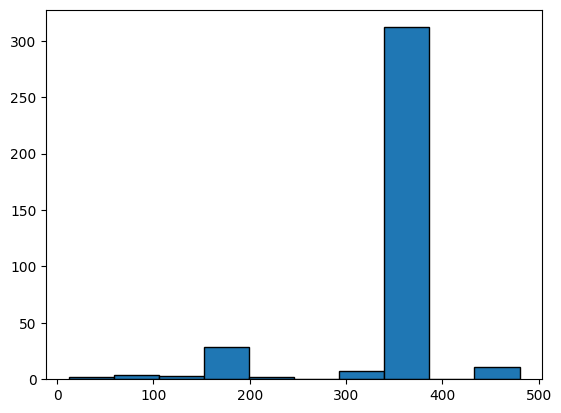

In [54]:
#  histogram của LoanAmount_Term
# Vẽ biểu đồ histogram cho cột "Loan_Amount_Term"
plt.hist(data['Loan_Amount_Term'], bins=10, edgecolor='black')
# viên biểu đồ
# line của cột


In [55]:
# TRung bình của Loan_Amount_Term
mean_loan_amount_term = data['Loan_Amount_Term'].mean()
# Trung vị của Loan_Amount_Term
median_loan_amount_term = data['Loan_Amount_Term'].median()
# max của Loan_Amount_Term, min của Loan_Amount_Term
max_loan_amount_term = data['Loan_Amount_Term'].max()
min_loan_amount_term = data['Loan_Amount_Term'].min()
print("Trung bình của Loan_Amount_Term:", mean_loan_amount_term)
print("Trung vị của Loan_Amount_Term:", median_loan_amount_term)

print("Max của Loan_Amount_Term:", max_loan_amount_term)
print("Min của Loan_Amount_Term:", min_loan_amount_term)

Trung bình của Loan_Amount_Term: 340.86486486486484
Trung vị của Loan_Amount_Term: 360.0
Max của Loan_Amount_Term: 480.0
Min của Loan_Amount_Term: 12.0


đựa vào đồ thị Histogram của Loan_Amount_Term cho thấy THỜI hạn vay khoảng 1 năm
## Thời hạn vay thấp nhất là: khoảng 2 tuần
## Thời hạn vay cao nhất gần 15 - 16 tháng

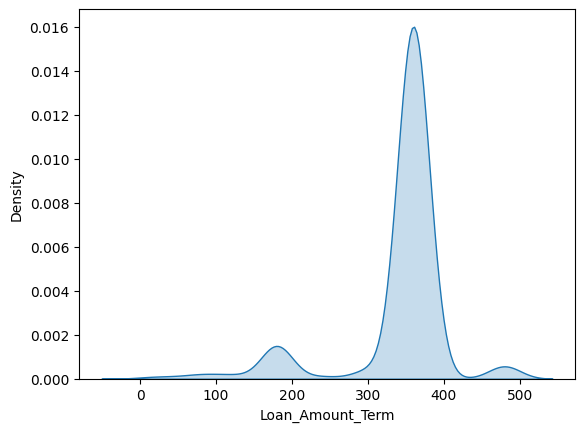

C:\Users\Admin\AppData\Local\Temp\ipykernel_14324\3900961453.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Loan_Amount_Term'], shade=True)


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

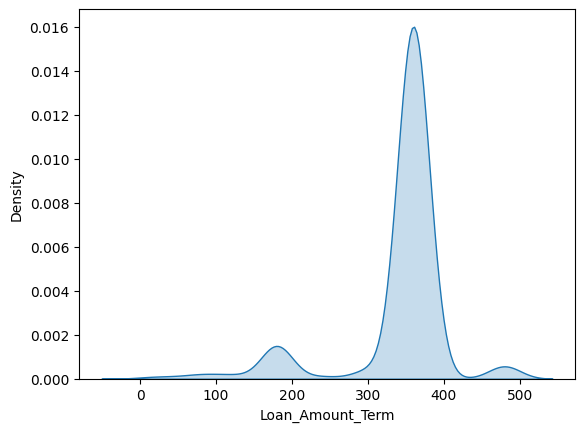

In [59]:
# vẽ kdeplot cột loan_Amount_tern
import seaborn as sns
sns.kdeplot(data['Loan_Amount_Term'], shade=True)
# Hiển thị biểu đồ
